In [1]:
import pyemma
import pickle
import os
import glob
import torch

import mdtraj as md
import numpy as np
import nglview as nv
import matplotlib.pyplot as plt
import numpy as np

np.bool = np.bool_

from tqdm import tqdm
from matplotlib.colors import LogNorm
from itertools import combinations

blue = (70 / 255, 110 / 255, 250 / 255)
green = (100 / 255, 170 / 255, 120 / 255)

molecule = "2F4K"
simulation_idx = 0
base_dir = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-protein"
save_dir = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein"
pdb_path = f"/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/2f4k_from_maestro.pdb"

# Visualization

In [2]:
name2letter = {
	"ALA": "A",
	"CYS": "C",
	"ASP": "D",
	"GLU": "E",
	"PHE": "F",
	"GLY": "G",
	"HIS": "H",
	"ILE": "I",
	"LYS": "K",
	"LEU": "L",
	"MET": "M",
	"ASN": "N",
	"PRO": "P",
	"GLN": "Q",
	"ARG": "R",
	"SER": "S",
	"THR": "T",
	"VAL": "V",
	"TRP": "W",
	"TYR": "Y",
	"NLE": "X",
}

pdb_traj = md.load_pdb(pdb_path) 
residue_names = [residue.name for residue in pdb_traj.topology.residues]
one_letter_str = ""
for idx, names in enumerate(residue_names):
    # print(f"Letter {idx}: {name2letter[names]}")
    one_letter_str += name2letter[names]
print(one_letter_str)

LSDEDFKAVFGMTRSAFANLPLWXQQHLXKEKGLF


In [2]:
print(pdb_path)
pdb_traj = md.load_pdb(pdb_path)
print(pdb_traj)
pdb_view = nv.show_mdtraj(pdb_traj)
pdb_view.add_representation("licorice", selection="protein")
pdb_view

/home/shpark/prj-mlcv/lib/DESRES/data/2F4K/2f4k_from_maestro.pdb
<mdtraj.Trajectory with 1 frames, 577 atoms, 35 residues, and unitcells>


NGLWidget()

In [3]:
# Count the number of .dcd files in the simulation directory
dcd_pattern = f"{base_dir}/{molecule}-{simulation_idx}-protein-*.dcd"
dcd_files = glob.glob(dcd_pattern)
num_files = len(dcd_files)

print(f"Found {num_files} .dcd files in {base_dir}")

# Extract the indices from filenames and sort them
file_indices = []
for file_path in dcd_files:
    filename = os.path.basename(file_path)
    # Extract the index from filename like "2JOF-0-protein-000.dcd"
    index_part = filename.split('-')[-1].replace('.dcd', '')
    if index_part.isdigit():
        file_indices.append(int(index_part))

file_indices.sort()
print(f"File indices range: {min(file_indices)} to {max(file_indices)}")

Found 63 .dcd files in /home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_2F4K-0-protein/2F4K-0-protein
File indices range: 0 to 62


In [4]:
# Load trajectories using the actual file indices found
traj_list = []
for i in tqdm(
    file_indices,
    desc="Loading trajectories"
):
    file_idx = f"{i:03d}"
    file_path = f"{base_dir}/{molecule}-{simulation_idx}-protein-{file_idx}.dcd"
    if os.path.exists(file_path):
        traj = md.load_dcd(file_path, top=pdb_path)
        traj_list.append(traj)
    else:
        print(f"Warning: File not found: {file_path}")

all_traj = md.join(traj_list)
print(f"Successfully loaded {len(traj_list)} trajectory files")
print(f"Number of frames: {all_traj.n_frames}")
view = nv.show_mdtraj(all_traj)
view.add_representation("licorice", selection="protein")
view

Loading trajectories: 100%|██████████| 63/63 [00:05<00:00, 11.51it/s]


Successfully loaded 63 trajectory files
Number of frames: 627907


NGLWidget(max_frame=627906)

In [5]:
# Map coordinates accordingly
atom_mapping = np.array([1, 2, 7, 8, 3, 4, 5, 6, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 9, 10, 11, 12, 13, 14, 301, 302, 303, 304, 305, 15, 16, 17, 18, 19, 20, 21, 22, 306, 307, 308, 309, 23, 24, 25, 26, 27, 28, 29, 30, 31, 310, 311, 312, 313, 314, 315, 32, 33, 34, 35, 36, 37, 38, 39, 316, 317, 318, 319, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 320, 321, 322, 323, 324, 325, 326, 327, 328, 51, 52, 58, 59, 53, 54, 55, 56, 57, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 60, 61, 62, 63, 64, 342, 343, 344, 345, 346, 65, 66, 67, 68, 69, 70, 71, 347, 348, 349, 350, 351, 352, 353, 354, 355, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 356, 357, 358, 359, 360, 361, 362, 363, 364, 83, 84, 85, 86, 365, 366, 367, 87, 88, 89, 90, 91, 92, 93, 94, 368, 369, 370, 371, 372, 373, 374, 375, 376, 95, 96, 97, 98, 99, 100, 101, 377, 378, 379, 380, 381, 382, 383, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 113, 114, 115, 116, 117, 118, 397, 398, 399, 400, 401, 119, 120, 121, 122, 123, 402, 403, 404, 405, 406, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 407, 408, 409, 410, 411, 412, 413, 414, 415, 135, 136, 137, 138, 139, 416, 417, 418, 419, 420, 140, 141, 142, 143, 144, 145, 146, 147, 421, 422, 423, 424, 425, 426, 148, 149, 150, 151, 152, 153, 154, 155, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 156, 157, 158, 159, 160, 161, 162, 438, 439, 440, 441, 442, 443, 444, 163, 164, 165, 166, 167, 168, 169, 170, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 185, 186, 187, 188, 189, 190, 191, 192, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 193, 194, 195, 196, 197, 198, 199, 200, 201, 477, 478, 479, 480, 481, 482, 483, 484, 202, 203, 204, 205, 206, 207, 208, 209, 210, 485, 486, 487, 488, 489, 490, 491, 492, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 493, 494, 495, 496, 497, 498, 499, 500, 221, 222, 223, 224, 225, 226, 227, 228, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 229, 230, 231, 232, 233, 234, 235, 236, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 237, 238, 244, 245, 239, 240, 241, 242, 243, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 246, 247, 248, 249, 250, 251, 252, 253, 254, 536, 537, 538, 539, 540, 541, 255, 256, 262, 263, 257, 258, 259, 260, 261, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 264, 265, 266, 267, 555, 556, 557, 268, 269, 270, 271, 272, 273, 274, 275, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 276, 277, 285, 286, 278, 279, 280, 281, 282, 283, 284, 287, 569, 570, 571, 572, 573, 574, 575, 576, 577])
new_traj = md.load_pdb(pdb_path)
all_traj.xyz = all_traj.xyz[:, atom_mapping - 1]
view = nv.show_mdtraj(all_traj)
view.add_representation("licorice", selection="protein")
view

NGLWidget(max_frame=627906)

# Descriptors

In [6]:
ca_resid_pair = np.array(
    [(a.index, b.index) for a, b in combinations(list(traj.topology.residues), 2)]
)
print(ca_resid_pair.shape)
print(ca_resid_pair)
all_traj_ca_pair_distances, _ = md.compute_contacts(
	all_traj, scheme="ca", contacts=ca_resid_pair, periodic=False
)
print(all_traj_ca_pair_distances.shape)

(595, 2)
[[ 0  1]
 [ 0  2]
 [ 0  3]
 ...
 [32 33]
 [32 34]
 [33 34]]
(627907, 595)


In [7]:
ca_resid_pair = np.array(
	[(a.index, b.index) for a, b in combinations(list(all_traj.topology.residues), 2)]
)
ca_pair_contacts, resid_pairs = md.compute_contacts(
	all_traj, scheme="ca", contacts=ca_resid_pair, periodic=False
)
print(ca_pair_contacts.shape)
print(ca_pair_contacts.mean())

# torch.save(
#     torch.from_numpy(ca_pair_contacts),
# 	f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-cad.pt"
# )

(627907, 595)
1.3632259


In [8]:
exp = 2
ca_pair_distances_switch = (1 - (np.power(ca_pair_contacts, exp) / 0.8)) / (1 - (np.power(ca_pair_contacts, exp) / 0.8))
print(ca_pair_distances_switch.shape)
print(ca_pair_distances_switch.mean())

# torch.save(
#     torch.from_numpy(ca_pair_distances_switch),
# 	f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-cad-switch.pt"
# )

(627907, 595)
1.0


In [9]:
xyz = all_traj.xyz
print(xyz.shape)

# torch.save(
#     torch.from_numpy(xyz),
#     f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-pos.pt"
# )

(627907, 577, 3)


# TICA

In [ ]:
def cad2switch(
    cad,
    cutoff: float = 0.8
) -> np.ndarray:
	if type(cad) == torch.Tensor:
		cad = cad.numpy()
	return (1 - np.power(cad / cutoff, 6)) / (1 - np.power(cad / cutoff, 12))

/home/shpark/.conda/envs/bioemu/lib/python3.10/site-packages/decorator.py:235: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/shpark/.conda/envs/bioemu/lib/python3.10/site-packages/decorator.py line 235. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|          | 0/6 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/6 [00:00<?, ?it/s]

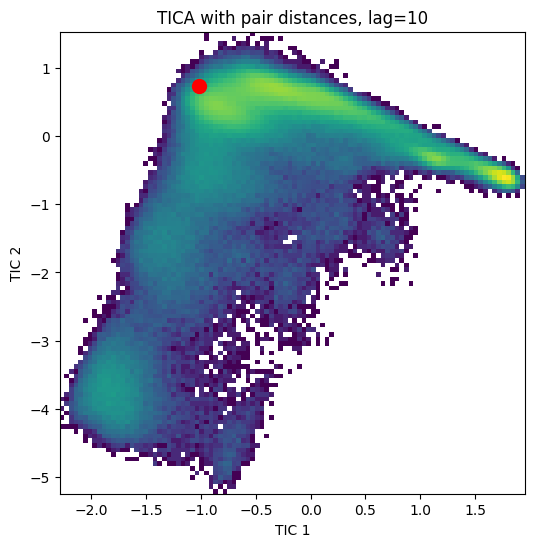

/home/shpark/.conda/envs/bioemu/lib/python3.10/site-packages/decorator.py:235: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/shpark/.conda/envs/bioemu/lib/python3.10/site-packages/decorator.py line 235. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|          | 0/6 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/6 [00:00<?, ?it/s]

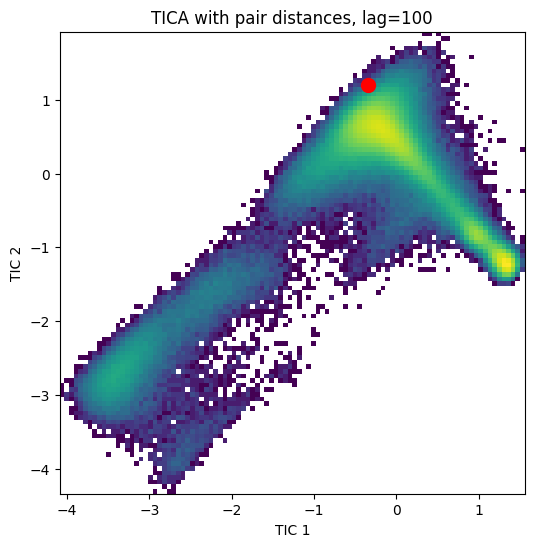

/home/shpark/.conda/envs/bioemu/lib/python3.10/site-packages/decorator.py:235: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from /home/shpark/.conda/envs/bioemu/lib/python3.10/site-packages/decorator.py line 235. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


calculate covariances:   0%|          | 0/6 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/6 [00:00<?, ?it/s]

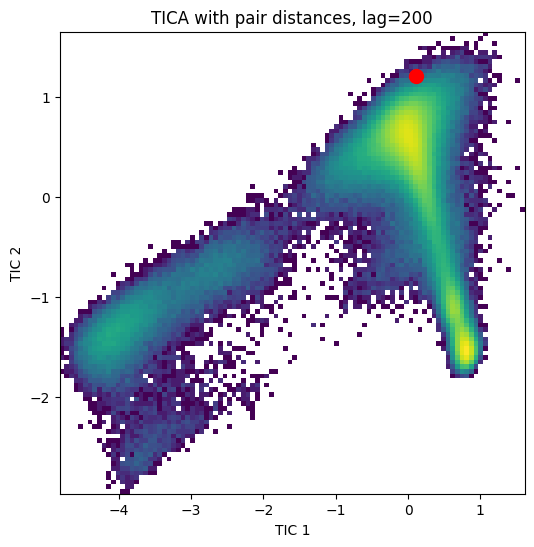

In [52]:
# TICA with pair distances
pdb_state = md.load(pdb_path)
pdb_state_ca_pair_distances, pdb_resid_pairs = md.compute_contacts(pdb_state, scheme="ca", contacts=ca_resid_pair, periodic=False)

for lag in (10, 100, 200):
	data = ca_pair_contacts
	tica_obj = pyemma.coordinates.tica(data, lag=lag, dim=2)
	tica_data = tica_obj.get_output()[0]
	x = tica_data[:, 0]
	y = tica_data[:, 1]

	pdb_tica_data = tica_obj.transform(pdb_state_ca_pair_distances)
	pdb_tica_x = pdb_tica_data[:, 0]
	pdb_tica_y = pdb_tica_data[:, 1]

	# Plot
	fig = plt.figure(figsize=(6, 6))
	ax = fig.add_subplot(111)
	ax.hist2d(x, y, bins=100, norm=LogNorm())
	ax.scatter(pdb_tica_x, pdb_tica_y, color="red", s=100)
	ax.set_xlabel("TIC 1")
	ax.set_ylabel("TIC 2")
	plt.title(f"TICA with pair distances, lag={lag}")
	plt.savefig(f'/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/{molecule}_tica_model_lag{lag}.png')
	plt.show()
	plt.close()

	with open(f'/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/{molecule}_tica_model_lag{lag}.pkl', 'wb') as f:
		pickle.dump(tica_obj, f)

In [16]:
# TICA background
lag = 10
with open(f'/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/{molecule}_tica_model_lag{lag}.pkl', 'rb') as f:
    tica_model = pickle.load(f)

tica_data = tica_model.transform(ca_pair_contacts)
x = tica_data[:, 0]
y = tica_data[:, 1]
print(x.shape)

(627907,)


[[ 1.7910982 -0.6510988]]


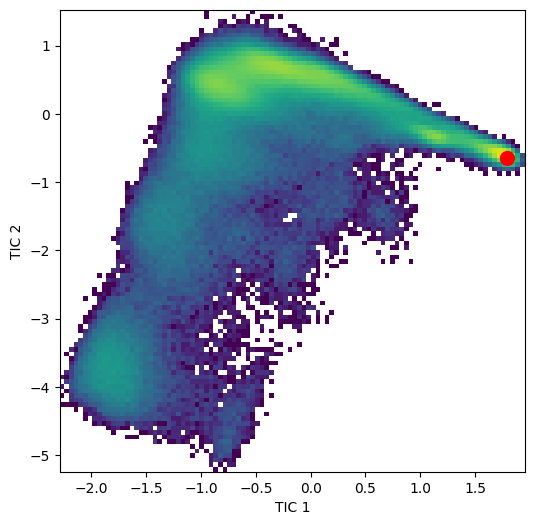

In [17]:
idx = 292341
sample_frame = all_traj[idx]
sample_ca_pair_distances, sample_ca_residue_idx = md.compute_contacts(
    sample_frame, scheme="ca", contacts=ca_resid_pair, periodic=False
)

sample_tica_data = tica_model.transform(sample_ca_pair_distances)
sample_tica_x = sample_tica_data[:, 0]
sample_tica_y = sample_tica_data[:, 1]
print(sample_tica_data)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.hist2d(x, y, bins=100, norm=LogNorm())
ax.scatter(sample_tica_x, sample_tica_y, color="red", s=100)
ax.set_xlabel("TIC 1")
ax.set_ylabel("TIC 2")
plt.show()

In [61]:
sample_frame.save_pdb("/home/shpark/prj-mlcv/lib/DESRES/data/2F4K/folded.pdb")

# Analysis

## RMSD to Folded state

In [11]:
def rmsd_to_refpdb(
	traj: md.Trajectory,
	reference_traj: md.Trajectory,
	atom_type: str = "ca",
) -> np.ndarray:
	"""
	Generate binary labels for folded/unfolded states based on RMSD
	"""
	if atom_type == "ca":
		atom_indices = traj.topology.select("name CA")
		print(atom_indices)
	else:
		atom_indices = None
	
	rmsd = md.rmsd(
		target = traj,
		reference = reference_traj,
		atom_indices = atom_indices
	)
	return rmsd

### Folded

[  1  22  33  45  60  72  92 114 124 140 160 167 184 198 222 233 243 263
 273 287 306 320 339 363 382 399 416 434 453 472 494 509 531 538 557]
0.61732477


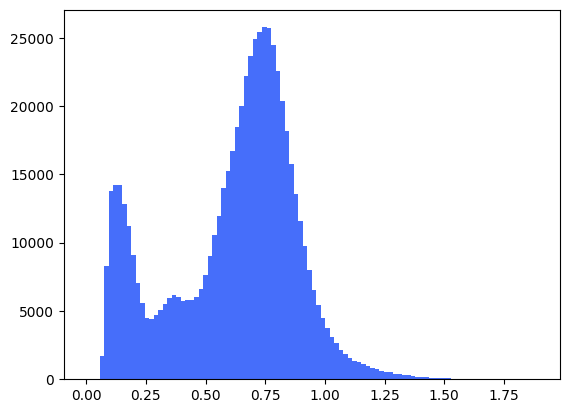

In [12]:
ref_pdb_path = f"/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/folded.pdb"
ref_pdb_traj = md.load_pdb(ref_pdb_path)
rmsd = rmsd_to_refpdb(
    traj = all_traj,
    reference_traj = ref_pdb_traj,
)

print(rmsd.mean())
plt.hist(
    rmsd,
    bins=100,
    # log=True,
    color=blue,
)
plt.show()

In [13]:
print(all_traj)
print(rmsd.shape)

# torch.save(
#     torch.from_numpy(rmsd),
#     f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-rmsd.pt"
# )
# torch.save(
#     torch.from_numpy(rmsd < 0.3),
#     f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-label-rmsd-folded.pt"
# )

<mdtraj.Trajectory with 627907 frames, 577 atoms, 35 residues, and unitcells>
(627907,)


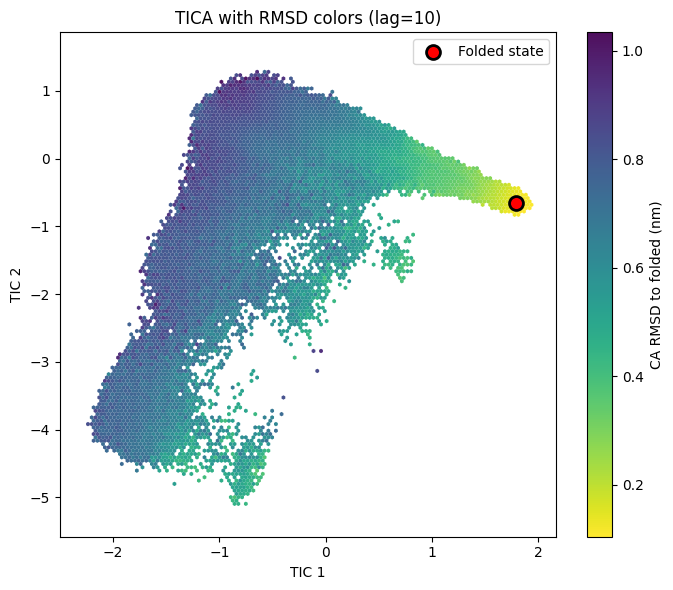

In [23]:
# Plot TICA with RMSD colors
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)
folded_pdb_path = f"/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/folded.pdb"
folded_pdb_traj = md.load_pdb(folded_pdb_path)
folded_pdb_ca_distances, folded_pdb_ca_residue_idx = md.compute_contacts(
    folded_pdb_traj, scheme="ca", contacts=ca_resid_pair, periodic=False
)
folded_tica = tica_model.transform(folded_pdb_ca_distances)
folded_tica_x = folded_tica[:, 0]
folded_tica_y = folded_tica[:, 1]

sc = ax.hexbin(
	x, y,
	C=rmsd,
	gridsize=120,
	cmap='viridis_r',
	reduce_C_function=np.mean,
 	mincnt=3,
  	linewidths=0,
  	edgecolors="none",
   	alpha=0.95,
)
ax.scatter(
    folded_tica_x,
    folded_tica_y,
    c="red",
    s=100,
    edgecolors="k",
    linewidths=2,
    label="Folded state",
)
ax.set_xlabel("TIC 1")
ax.set_ylabel("TIC 2")
ax.set_title(f"TICA with RMSD colors (lag={lag})")
ax.legend(loc="best")
cb = plt.colorbar(sc, ax=ax)
cb.set_label("CA RMSD to folded (nm)")
plt.tight_layout()
plt.show()
plt.close()

### Unfolded

In [14]:
rmsd_loaded = torch.load( f"{save_dir}/{molecule}-{simulation_idx}-rmsd.pt").numpy()
rmsd_max_frame_idx = np.argmax(rmsd_loaded)
rmsd_max_frame = all_traj[rmsd_max_frame_idx]
rmsd_view = nv.show_mdtraj(rmsd_max_frame)
rmsd_view.add_representation("licorice", selection="protein")
rmsd_view

NGLWidget()

In [19]:
ref_pdb_path = f"/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/folded.pdb"
ref_pdb_traj = md.load_pdb(ref_pdb_path)
atom_indices = all_traj.topology.select("name CA")

max_rmsd = md.rmsd(
	target = rmsd_max_frame,
	reference = ref_pdb_traj,
	atom_indices = atom_indices
)
print(max_rmsd)

[1.8888547]


In [16]:
save_path = f"/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/unfolded.pdb"
rmsd_max_frame.save_pdb(save_path)

[  1  22  33  45  60  72  92 114 124 140 160 167 184 198 222 233 243 263
 273 287 306 320 339 363 382 399 416 434 453 472 494 509 531 538 557]
(627907,)
1.9111134


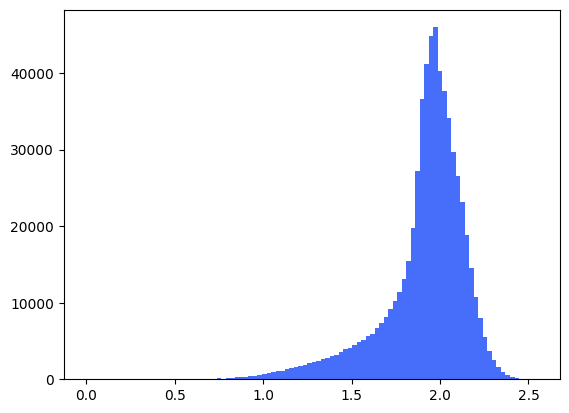

In [17]:
unfolded_path = f"/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/unfolded.pdb"
unfolded_traj = md.load_pdb(unfolded_path)
rmsd_to_unfolded = rmsd_to_refpdb(
    traj = all_traj,
    reference_traj = unfolded_traj,
)

print(rmsd_to_unfolded.shape)
print(rmsd_to_unfolded.mean())
plt.hist(
    rmsd_to_unfolded,
    bins=100,
    # log=True,
    color=blue,
)
plt.show()


## Secondary structure

In [7]:
dssp_all = md.compute_dssp(
    all_traj,
    simplified=False
)
print(dssp_all.shape)
print(np.unique(dssp_all))
print(dssp_all[0])
dssp_path = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-0-protein/{molecule}-0-dssp.npy"
np.save(dssp_path, dssp_all)

(627907, 35)
[' ' 'B' 'E' 'G' 'H' 'I' 'S' 'T']
[' ' ' ' 'T' 'T' 'T' 'S' ' ' ' ' 'S' 'S' ' ' 'T' 'T' 'S' ' ' 'G' 'G' 'G'
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' 'S' ' ' ' ' ' ' ' ' ' ' 'S' 'S' ' ' ' ']


In [8]:
dssp_simplified = md.compute_dssp(
    all_traj,
    simplified=True
)
print(dssp_simplified.shape)
print(np.unique(dssp_simplified))
print(dssp_simplified[0])
dssp_simplified_path = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-0-protein/{molecule}-0-dssp-simplified.npy"
np.save(dssp_simplified_path, dssp_simplified)

(627907, 35)
['C' 'E' 'H']
['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'H' 'H' 'H'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']


# Conclusion